In [3]:
from torcheeg.datasets import SEEDDataset
from torcheeg import transforms

dataset = SEEDDataset(root_path='./SEED/SEED_EEG/Preprocessed_EEG',
                      io_path= './.torcheeg/datasets_1733096538063_BMIJn',
                      online_transform=transforms.Compose([
                          transforms.ToTensor(),
                          transforms.To2d()
                      ]),
                      label_transform=transforms.Compose([
                          transforms.Select('emotion'),
                          transforms.Lambda(lambda x: x + 1)
                      ]),
                      num_worker = 4)
datasex = dataset[0]
print(datasex[0].shape)

[2024-12-03 08:29:20] INFO (torcheeg/MainThread) 🔍 | Detected cached processing results, reading cache from ./.torcheeg/datasets_1733096538063_BMIJn.


torch.Size([1, 62, 200])


C:\Users\hamza\AppData\Local\Temp\ipykernel_19044\699684034.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = plot_3d_tensor(torch.tensor(dataset[0][0]))


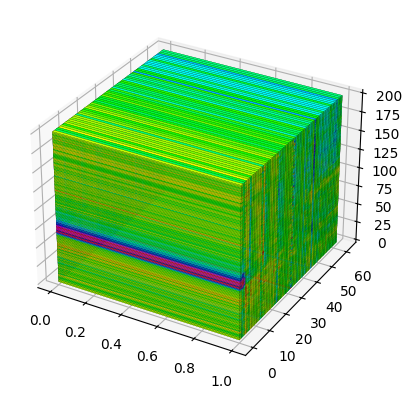

In [4]:
import torch
from torcheeg.utils import plot_3d_tensor

img = plot_3d_tensor(torch.tensor(dataset[0][0]))

In [5]:
from torcheeg.model_selection import LeaveOneSubjectOut
from torch.utils.data import DataLoader


print(f"Dataset size: {len(dataset)}")
print(f"Sample format: {dataset[0]}")  # Check a single sample

Dataset size: 152730
Sample format: (tensor([[[-19.2821,  -9.2983, -25.7790,  ..., -15.5568, -17.4940, -19.9080],
         [ 11.9209,  20.5338,  11.4143,  ...,   3.2187,  -1.1623,  13.7687],
         [  0.5662,  18.8053, -11.0865,  ..., -26.4943, -23.6630,   8.3148],
         ...,
         [  3.4571,  10.7288,  -6.7949,  ...,  12.5468,  10.4606,  14.4243],
         [  5.2452,  11.7719,  -3.6657,  ...,  15.0800,  11.4143,  20.0272],
         [  9.0897,   6.3479,   1.1623,  ...,  10.3712,  12.5468,  17.9410]]]), 2)


In [ ]:
cv = LeaveOneSubjectOut()

for train_dataset, test_dataset in cv.split(dataset):
    train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)